## **Older Error code**

In [ ]:
!pip install -q watermark

In [ ]:
%load_ext watermark

%watermark -v -p cv2

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

cv2: 4.1.2



In [ ]:
def show_image(image, show_axis=True):
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if not show_axis:
    plt.axis('off');

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
from google.colab.patches import cv2_imshow

%matplotlib inline

sns.set_style("white")
rcParams['figure.figsize'] = 12, 10

Shape: (600, 400, 3)
Data type: uint8
RGB Color Space


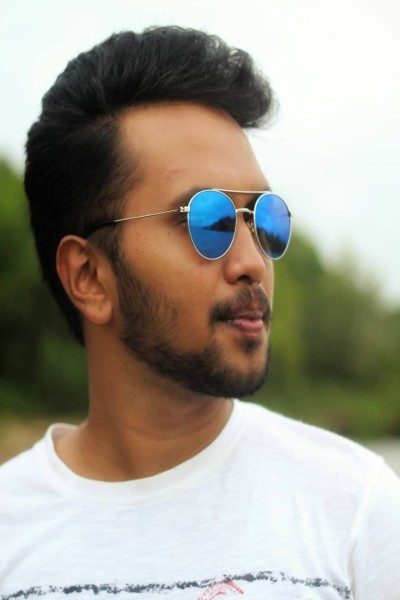

In [ ]:
img = cv2.imread(filename = '/content/drive/MyDrive/Presets/VivekKini.jpg', flags = cv2.IMREAD_COLOR)
print('Shape:', img.shape)
print('Data type:', img.dtype)
print('RGB Color Space')
cv2_imshow(img)

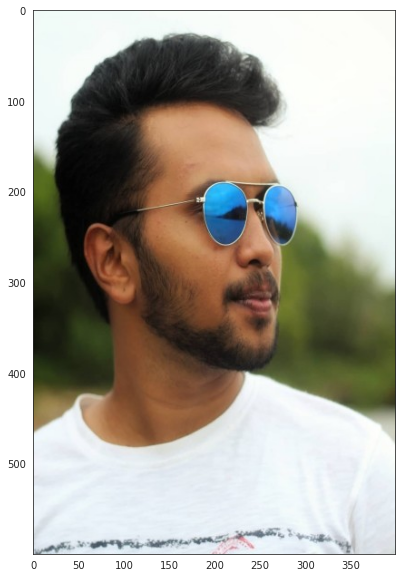

In [ ]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB));

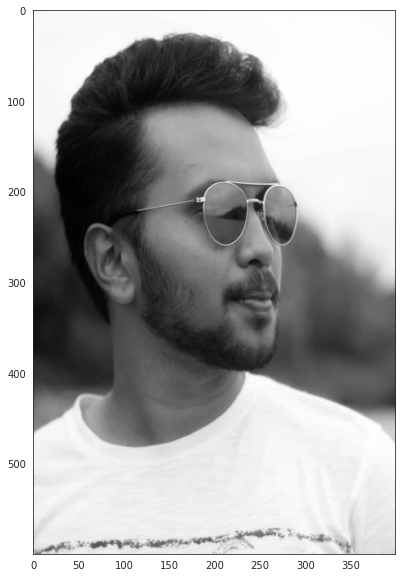

In [ ]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY), cmap = 'gray');

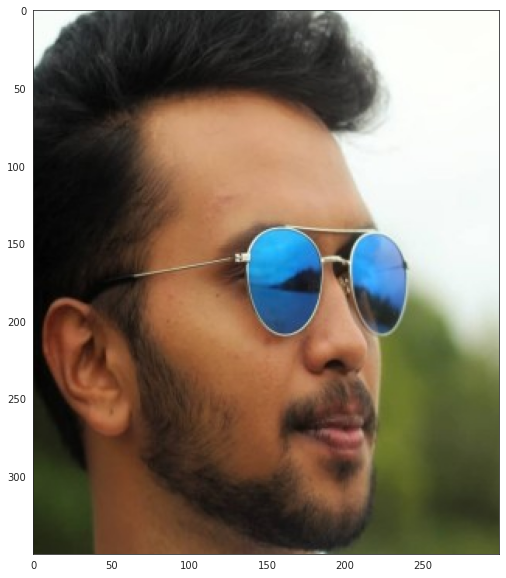

In [ ]:
cropped = img[50:400, 50:350]

show_image(cropped)

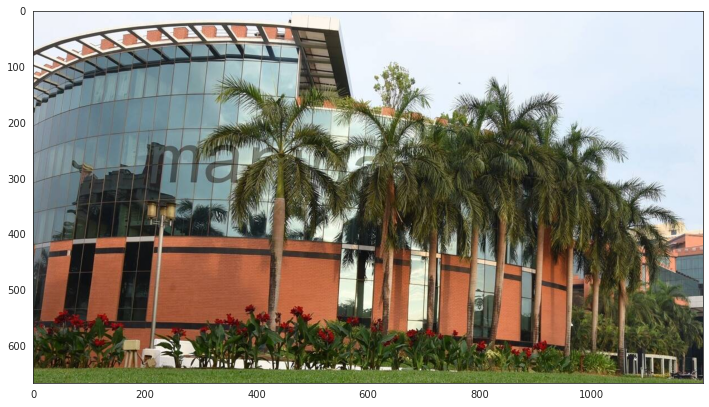

In [ ]:
background = cv2.imread('/content/drive/MyDrive/Presets/manipal-edu.jpg', cv2.IMREAD_COLOR)
h, w, _ = background.shape

background = cv2.resize(background, (w , h ))

show_image(background)

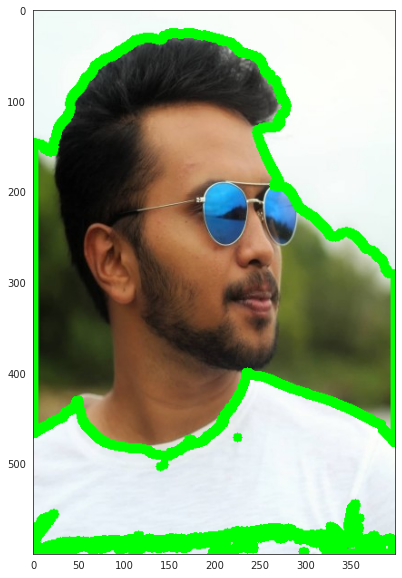

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = img.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 10
  )
)

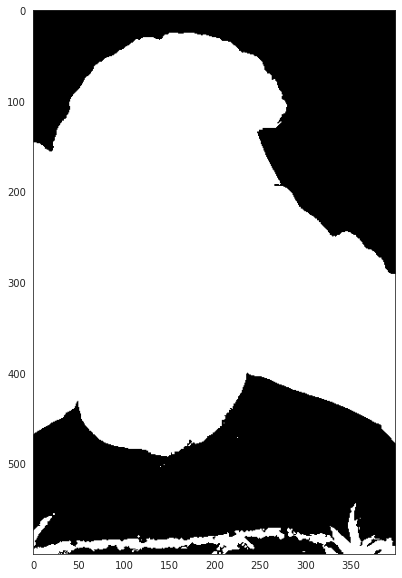

In [ ]:
mask = np.zeros_like(img)
mask = cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)

show_image(mask)

In [ ]:
m_m = cv2.bitwise_and(
  src1 = cropped, 
  src2 = cropped, 
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
)

error: ignored

In [ ]:
_, alpha = cv2.threshold(
  src = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY), 
  thresh = 0, 
  maxval = 255, 
  type = cv2.THRESH_BINARY
) # 0 = black, where ever their is black we ned to make it alpha i.e, GYM
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = background.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
  final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                          alpha_l * final_image[:, :, c])
show_image(final_image)

error: ignored

In [107]:
import cv2
import numpy as np

#convert to float to make things easier
img2 = cv2.imread('/content/drive/MyDrive/Presets/manipal-edu.jpg',cv2.IMREAD_COLOR)
img1 = cv2.imread('/content/drive/MyDrive/Presets/VivekKini.jpg',cv2.IMREAD_COLOR)
img1 = img1.astype('float')
img2 = img2.astype('float')
img1/=255
img2/=255

#mask a mask based on the black or white pixels
#all black and white pixels become black in the mask
#everything else becomes white
mask = np.copy(img1)
b,g,r = cv2.split(mask)
mask = (b+g+r)/3
#using .2 and .9 because there are compression artifacts in the image
mask[mask>=.9] = 0
mask[mask<=.2] = 0
mask[mask!=0] = 1

#making mask 3 channels to make composite easier
mask = cv2.merge([mask,mask,mask])
#over_operation = (img1*alpha) + (background*(1-alpha))
#output = (img1*mask) + (img2*(1-mask))
x= img1*mask
y= img2*(mask-1)

ValueError: ignored

## **Newer Code**

Shape: (600, 400, 3)
Data type: uint8
RGB Color Space


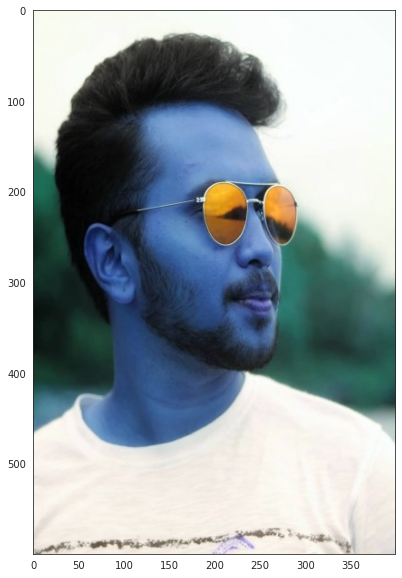

In [108]:
img = cv2.imread(filename = '/content/drive/MyDrive/Presets/VivekKini.jpg', flags = cv2.IMREAD_COLOR)
print('Shape:', img.shape)
print('Data type:', img.dtype)
print('RGB Color Space')
plt.imshow(img)

height: 600, width: 400, color channels: 3


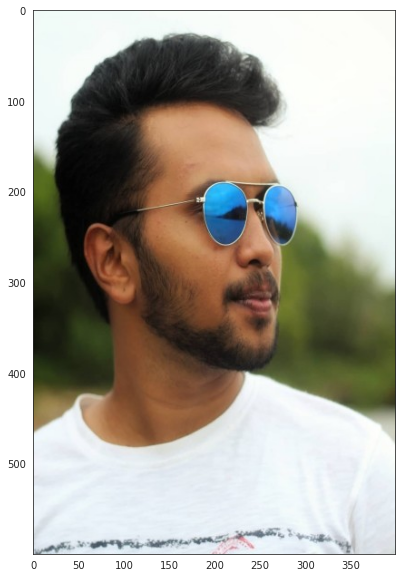

In [109]:
h, w, channels = img.shape
print(f'height: {h}, width: {w}, color channels: {channels}')
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB));

In [110]:
def show_image(image, show_axis=True):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not show_axis:
        plt.axis('off');

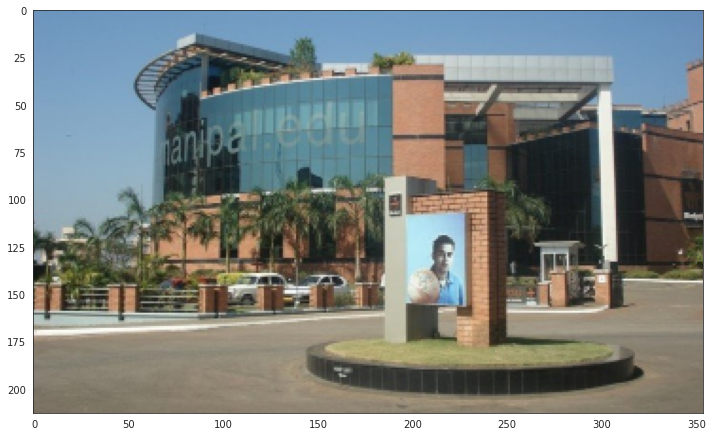

In [111]:
background = cv2.imread('/content/drive/MyDrive/Presets/EDU Block.jpg', cv2.IMREAD_COLOR)
h, w, _ = background.shape
background = cv2.resize(background, (w // 2, h // 2))
show_image(background)

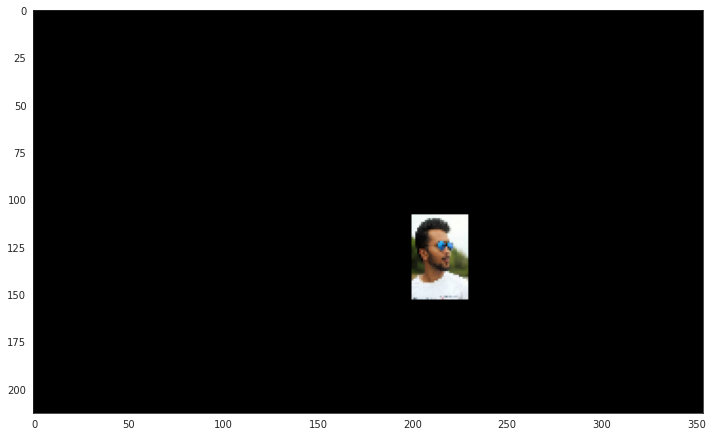

In [112]:
img = cv2.resize(img, (30, 45))
new_mask = np.zeros_like(background)
new_mask[
 108: 108 + img.shape[0],
 200: 200 + img.shape[1]
] = img # width and height
show_image(new_mask)

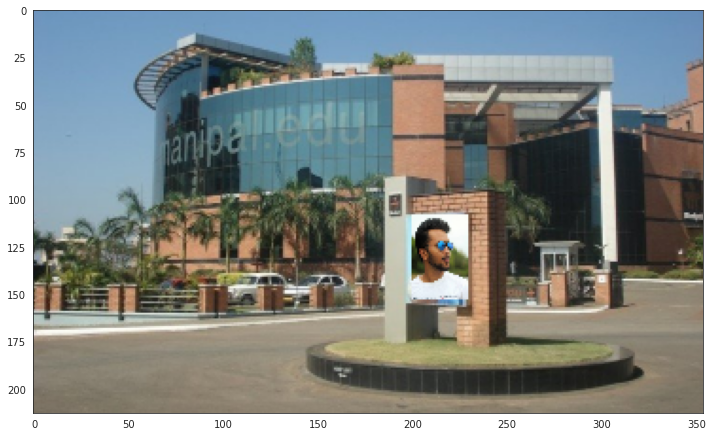

In [113]:
_, alpha = cv2.threshold(
src = cv2.cvtColor(new_mask, cv2.COLOR_RGB2GRAY),
thresh = 0,
maxval = 255,
type = cv2.THRESH_BINARY
) # 0 = black, where ever their is black we ned to make it alpha i.e, GYM
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = background.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s
for c in range(0, 3):
    final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                            alpha_l * final_image[:, :, c])
show_image(final_image)

In [114]:
cv2.imwrite('merged_image.jpg', final_image)

True